<a href="https://colab.research.google.com/github/Thiagogiovanni/projetos_de_estudo/blob/main/projetochurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto Churn**

<center><img width="50%" src='https://blog.pixdigital.com.br/wp-content/uploads/2022/02/6-dicas-para-reduzir-o-churn-em-emrpesas-saas.jpg'></center>

**Churn** é uma métrica usada para indicar a quantidade de clientes que cancelam o serviço de determinada empresa. Ficar de olho nessa métrica, mantendo ela baixa é essencial para saúde do negócio.

O objetivo desse projeto é criar um modelo para prever se futuros cliente abandonarão ou não a empresa. Sabendo se o cliente é um potencial cancelador do serviço ou não dá uma ótima brecha para tentar mantê-lo.

Tendo uma boa previsão sobre isso podemos adotar algumas atitudes, como:

* Ofertar um atendimento personalizado
* Melhoria em preços/serviços 
* Definir o perfil do cliente
* Oferecer comissões para vendedores que convencerem tal cliente a continuar com os serviços
* Destinar profissionais mais experientes para lidar com esses clientes

# Obtenção dos dados

Os dados são de uma empresa de Telecom, podemos achar os dados no [Kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)


# Dicionário do dataset

* **customerID**: ID do cliente
* **gender**: Gênero do cliente (Male ou Female)
* **SeniorCitizen** : Cliente é idoso ou não (1, 0)
* **Partner** : Casado ou não (Yes, No)
* **Dependents** : Se o cliente possui dependentes (Yes, No)
* **tenure** : Número de meses que o cliente está na empresa
* **PhoneService** : Se o cliente possui ou não serviço de celular (Yes, No)
* **MultipleLines** : Se o cliente possui mais de 1 linha de telefone (Yes, No, No phone service)
* **InternetService** : Se o cliente possui serviço de internet (DSL, Fiber optic, No)
* **OnlineSecurity** : Se o cliente possui auxílio para segurança online (Yes, No, No internet service)
* **OnlineBackup** : Se o cliente possui backup online (Yes, No, No internet service)
* **DeviceProtection** : Se o cliente possui proteção do seu dispositivo (Yes, No, No internet service)
* **TechSupport** : Se o cliente optou por suporte técnico (Yes, No, No internet service)
* **StreamingTV** : Se o cliente possui serviço de Streaming (Yes, No, No internet service)
* **StreamingMovies** : Se o cliente possui serviço de Streaming de filmes (Yes, No, No internet service)
* **Contract** : Qual tipo de contrato do cliente (Month-to-month, One year, Two year)
* **PaperlessBilling** : Se o cliente recebe fatura em papel ou não (Yes, No)
* **PaymentMethod** : Método de pagamento (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* **MonthlyCharges** : Valor da conta mensal
* **TotalCharges** : Valor total de contas
* **Churn(Target)** : Se o cliente saiu ou não da empresa (Yes or No)

In [2]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler
import scikitplot as skplt
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score


# importar os dados
DATA_PATH = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(DATA_PATH)

# ver as 5 primeiras entradas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Analisando dimensoes do dataset

print(
"Entradas: \t {}\nVariáveis: \t {}".format(df.shape[0],df.shape[1]))

Entradas: 	 7043
Variáveis: 	 21


In [4]:
# Checando colunas
df.columns.unique

<bound method Index.unique of Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')>

In [5]:
# Vendo numero de nulos no dataset

df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
# Checar quantidade de Churn

df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [7]:
# Checar proporção de  Churn

df.Churn.value_counts()/df.shape[0]

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

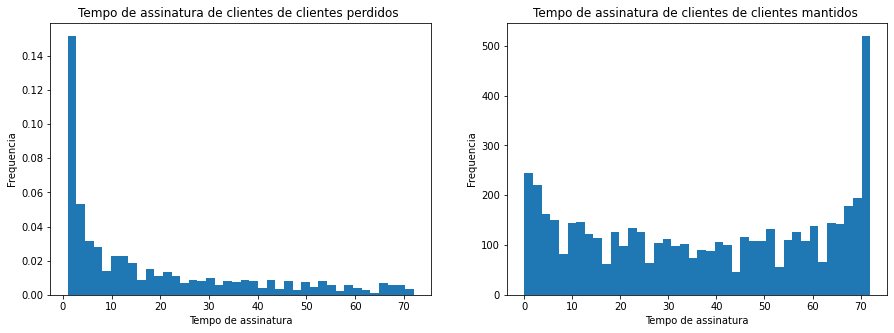

In [9]:
#Vendo distribuicao dos casos positivos e negativos do Churn com relacao a variavel tenure(tempo com o plano)

#Veja que o resultado faz sentido, pois quanto mais tempo na empresa o cliente está menor a chance dele sair

fig, ax = plt.subplots(ncols = 2, figsize = (15,5))

dfyes = (df[df.Churn == 'Yes'])
dfno = (df[df.Churn == 'No'])

ax[0].hist('tenure', data = dfyes, density = True, bins = 40)
ax[0].set_title("Tempo de assinatura de clientes de clientes perdidos ")
ax[0].set_xlabel('Tempo de assinatura')
ax[0].set_ylabel('Frequencia')


ax[1].hist('tenure', data = dfno, bins = 40)
ax[1].set_title("Tempo de assinatura de clientes de clientes mantidos ")
ax[1].set_xlabel('Tempo de assinatura')
ax[1].set_ylabel('Frequencia')

plt.show()

In [11]:
# Olhando o tipo das variáveis
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
# Checando possiveis outliers

# Aparentemente não temos problemas com isso, pois a média e a mediana estão relativamente próximas, além dos valores máximos e mínimos serem aceitáveis

df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Tratando dados e fazendo uma análise

Como esse é um projeto de estudo irei tratar alguns dados na 'mão' para treinar algumas funções mais básicas de manipulação, ao invés de aplicar funções que já resolveriam a questão das variáveis categóricas direto.

In [12]:
# Mudar os No por 0 e Yes por 1 nas colunas que só tem esses dois  valores

df.replace('No', 0, inplace=True)
df.replace('Yes', 1, inplace=True)

In [13]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


## 1º Problema

Quando se faz isso podemos perceber que algumas colunas que aparentemente só teriam *Yes* ou *No* ainda não mudaram para esse formato binário. Podemos ver isso abaixo

In [16]:
# Era esperado que na coluna OnlineSecurity teriamos apenas Yes ou No, porém, temos 'No internet service'

# Podemos supor que todos clientes sem serviço de internet acabaram 'prejudicando' isso que estavamos esperando (ter apenas Yes ou No)

# Vamos checar se essa hipótese está certa, primeiro vamos ver a quantidade de valores diferentes do esperado em OnlineSecurity:

df.OnlineSecurity.value_counts()

0                      3498
1                      2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [18]:
# Distribuição dos valores de DeviceProtection
df.DeviceProtection.value_counts()

0                      3095
1                      2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [19]:
# Veja que temos a mesma quantidade de clientes com o valor de 'No internet service' em 'OnlineSecurity',  'DeviceProtection' e em 'InternetService'. Vamos analisar
# mais profundamente se de fato todos que não possuem internet estão com esse mesmo tipo de valor nas outras colunas

df.InternetService.value_counts()

Fiber optic    3096
DSL            2421
0              1526
Name: InternetService, dtype: int64

In [20]:
# pegar a parte do dataframe das pessoas que não possuem servico de internet

df2 = df.loc[df.InternetService == 0]
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
11,7469-LKBCI,Male,0,0,0,16,1,0,0,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,0,Credit card (automatic),18.95,326.8,0
16,8191-XWSZG,Female,0,0,0,52,1,0,0,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,0,Mailed check,20.65,1022.95,0
21,1680-VDCWW,Male,0,1,0,12,1,0,0,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,0,Bank transfer (automatic),19.80,202.25,0
22,1066-JKSGK,Male,0,0,0,1,1,0,0,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,0,Mailed check,20.15,20.15,1
33,7310-EGVHZ,Male,0,0,0,1,1,0,0,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,0,Bank transfer (automatic),20.20,20.2,0


In [21]:
# pegar parte do dataframe que tem, por exemplo, DeviceProtection com No internet Service
df3 = df.loc[df.DeviceProtection == 'No internet service']
df3.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
11,7469-LKBCI,Male,0,0,0,16,1,0,0,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,0,Credit card (automatic),18.95,326.8,0
16,8191-XWSZG,Female,0,0,0,52,1,0,0,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,0,Mailed check,20.65,1022.95,0
21,1680-VDCWW,Male,0,1,0,12,1,0,0,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,0,Bank transfer (automatic),19.80,202.25,0
22,1066-JKSGK,Male,0,0,0,1,1,0,0,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,0,Mailed check,20.15,20.15,1
33,7310-EGVHZ,Male,0,0,0,1,1,0,0,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,0,Bank transfer (automatic),20.20,20.2,0


## Resolução 1º Problema

Veja que a hipótese foi comprovada, para resolver isso faremos apenas uma troca no valor de *No internet service* por um outro número diferente de 0 e 1.

Aqui vale ressaltar que a vontade inicial é mudar esse valor para zero, junto com *No*, porém é um pouco mais sensível.

Uma coisa é alguem ter internet e não optar por ter *OnlineSecurity* e *DeviceProtection* outra coisa é alguem não ter *OnlineSecurity* ou *DeviceProtection*  pois não tem internet. Por isso não iremos mudar apenas para zero.

In [23]:
# Resolver isso do 'No internet service' 

df.replace('No internet service', 3, inplace = True)

## 2º Problema

O mesmo que ocorre com a internet ocorre com o telefone.

In [24]:
# Analisando se o mesmo que ocorre com a internet ocorre com o telefone
df.PhoneService.value_counts()

1    6361
0     682
Name: PhoneService, dtype: int64

In [25]:
# Distribuiçao de MultipleLines
df.MultipleLines.value_counts()

0                   3390
1                   2971
No phone service     682
Name: MultipleLines, dtype: int64

## Resolução 2º Problema

In [26]:
# Usando o mesmo raciocínio anterior faremos isso, pois nao ter outras linhas tendo o servico de telefone é diferente de nao ter pois n tem o servico, logo:

df.MultipleLines.replace('No phone service', 3, inplace=True)

In [27]:
# Analisando tipo das variáveis 
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

## Testando hipótese de juntar variáveis

Pensei em juntar as variáveis de serviço de internet para "tem internet" ou "não tem", porém após tal análise foi visto que não era favorável tal ato


Aqui vimos que clientes com internet do tipo DSL tendem a permanecer mais com os serviços do que os clientes com fibra, ou seja, nao vamos juntar as duas variaveis (se fossem porcentagens próximas eu iria juntar).


In [28]:
# Analisando a hipótese de juntar os 2 tipos de servicos de internet (DSL e fibra) em um só, vamos ver como o Churn é distribuido dentro de clientes com Fibra
df[df.InternetService == 'Fiber optic'].Churn.value_counts()

0    1799
1    1297
Name: Churn, dtype: int64

In [29]:
# Olhando para proporção
df[df.InternetService == 'Fiber optic'].Churn.value_counts()/df[df.InternetService == 'Fiber optic'].shape[0]

0    0.581072
1    0.418928
Name: Churn, dtype: float64

In [24]:
# Vendo como o churn é distribuido dentro de clientes com internet do tipo DSL
df[df.InternetService == 'DSL'].Churn.value_counts()

0    1962
1     459
Name: Churn, dtype: int64

In [25]:
# Olhando para proporção
Df[df.InternetService == 'DSL'].Churn.value_counts()/df[df.InternetService == 'DSL'].shape[0]

0    0.810409
1    0.189591
Name: Churn, dtype: float64

## Finalizando tratamento de variáveis categóricas

Como falei, o objetivo desse notebook é treinar, por isso até agora fiz esse tratamento na mão, mas para acelerar o processo irei utilizar o método get dummies para lidar com o resto das variáveis categóricas.


In [30]:
# Abrindo as colunas gender,InternetService,Contract e PaymentMethod
df = pd.get_dummies(df, columns = ['gender','InternetService','Contract','PaymentMethod'])

In [31]:
# Setando o index do dataset para o id do cliente
df.set_index('customerID', inplace = True)

In [32]:
df.dtypes

SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                                object
Churn                                        int64
gender_Female                                uint8
gender_Male                                  uint8
InternetService_0                            uint8
InternetService_DSL            

## 3º Problema

Aqui falta apenas colocarmos a variáveis TotalCharges como numérica, para aplicarmos os modelos de machine learning, porém como podemos ver abaixo, uma variável que era para ser do tipo float está tendo problemas. Analisando o erro conseguimos ver que existem linhas com o valor ' ' preenchido dentro dessa coluna, vamos tratar isso.

In [33]:
# Problemas para fazer
df.TotalCharges = df.TotalCharges.astype('float64')

ValueError: ignored

In [34]:
# Veja que existem valores do tipo
df[df.TotalCharges == ' ']

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
4472-LVYGI,0,1,1,0,0,3,1,0,1,1,...,0,1,0,0,0,1,1,0,0,0
3115-CZMZD,0,0,1,0,1,0,3,3,3,3,...,1,0,0,0,0,1,0,0,0,1
5709-LVOEQ,0,1,1,0,1,0,1,1,1,0,...,0,1,0,0,0,1,0,0,0,1
4367-NUYAO,0,1,1,0,1,1,3,3,3,3,...,1,0,0,0,0,1,0,0,0,1
1371-DWPAZ,0,1,1,0,0,3,1,1,1,1,...,0,1,0,0,0,1,0,1,0,0
7644-OMVMY,0,1,1,0,1,0,3,3,3,3,...,1,0,0,0,0,1,0,0,0,1
3213-VVOLG,0,1,1,0,1,1,3,3,3,3,...,1,0,0,0,0,1,0,0,0,1
2520-SGTTA,0,1,1,0,1,0,3,3,3,3,...,1,0,0,0,0,1,0,0,0,1
2923-ARZLG,0,1,1,0,1,0,3,3,3,3,...,1,0,0,0,1,0,0,0,0,1


## Resolução 3º Problema

In [35]:
# Vamos tirar essas linhas problematicas

df.drop(df.index[df['TotalCharges'] == ' '], inplace = True)

In [36]:
# fazendo o que queriamos
df.TotalCharges = df.TotalCharges.astype('float64')

# Começando a criar o modelo de Machine Learning

Primeiro vamos rodar o modelo XGBoost (escolha aleatória) **sem balancear** as bases de treino e teste e ver como vai ocorrer. 

Minha ideia é comparar um mesmo modelo, nesse caso usarei o XGBoost, sem balanceamento e com o balanceamento para ver como proceder.

Nosso objetivo aqui é conseguir diminuir os erros relacionados ao prever se os clientes irão deixar ou não a empresa, ou seja, não iremos analisar o acerto geral, mas quanto dos clientes que abandonariam conseguiriamos prever, essa métrica de avaliação se chama **Recall**, iremos nos basear nela.

In [38]:
# Modelo sem balanceamento

# Instanciar e escolher o hyperparameter inicial

model = XGBClassifier(learning_rate = 0.1)

# Ajustar bases para quebrar em treino e teste

X = df.drop('Churn', axis=1)
y = df['Churn']

# Dividir o dataset entre treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Fit do modelo (treinar)
model.fit(X_train, y_train)

# Fazer previsões em cima de novos dados
y_pred = model.predict(X_test)

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.84      1245
           1       0.64      0.48      0.55       513

    accuracy                           0.77      1758
   macro avg       0.72      0.68      0.70      1758
weighted avg       0.76      0.77      0.76      1758



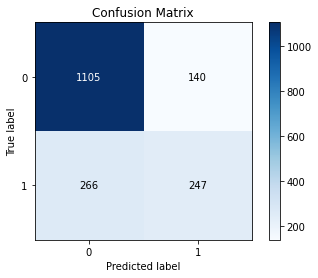

In [40]:
#matriz confusao inicial
skplt.metrics.plot_confusion_matrix(y_test, y_pred)


## Primeiro resultado

Como foi dito, nosso objetivo é maximizar o valor do Recall referente aos clientes que saem da empresa, que nesse caso foi de **48%**, ou seja, de todos que sairam conseguimos prever apenas **48%**

Alguns valores interessantes para compararmos mais tarde:

* **Acertos**: 247 casos (julgamos que sairiam e sairam)

* **Falso-Positivo**: 140 casos (julgamos que iriam sair e não sairam)

* **Falso-Negativo**: 266 casos (julgamos que não iriam sair e sairam)

Veja que esse é um resultado péssimo para o que queremos, pois tivemos um número maior **FN** do que de **FP**.

## **Métodos de balanceamento dos dados.**

Existem diversas formas de fazermos o balanceamento, irei destracar dois jeitos famosos:

* ***Undersampling***: Esse método reduz o desbalanceamento do dataset focando na classe majoritária, ou seja, ele elimina entradas da classe com maior número de ocorrências. Consequentemente, o método pode ter uma maior quantidade de Falsos-Positivos, pois pode se tornar mais difícil prever dados da classe majoritária (no nosso caso clientes que se mantiveram na empresa).

* ***Oversampling***: Cria novas observações da classe minoritária a partir das informações contidas nos dados originais. Com um argumento análogo podemos concluir que usando tal balanceamento iremos deteriorar o resultado sobre a variável minoritária (não queremos isso)

Nosso objetivo será aplicar o método usando o balanceamento do tipo Undersampling, pois pelo o que foi dito, será uma forma melhor para alcançarmos o que queremos (melhorar resultado sobre a classe minoritária).


In [41]:
# Fazendo o balanceamento 

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()

# Faremos tal balanceamento dentro das bases de treino, pois não queremos desconfigurar a base de teste.

X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)


# Veja como está distribuido, agora:

print('Tinhamos na base de treino y:\n{} \nAgora temos:\n{}'.format(y_train.value_counts(),y_train_rus.value_counts()))

Tinhamos na base de treino y:
0    3918
1    1356
Name: Churn, dtype: int64 
Agora temos:
0    1356
1    1356
Name: Churn, dtype: int64


In [42]:
# Vamos ver o desempenho do modelo nessas novas bases balanceadas

model = XGBClassifier(learning_rate = 0.1)

# Fit do modelo (treinar)
model.fit(X_train_rus, y_train_rus)

# Fazer previsões em cima de novos dados
y_pred_balanceado = model.predict(X_test)

In [43]:
print(classification_report(y_test, y_pred_balanceado))

              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1245
           1       0.53      0.81      0.64       513

    accuracy                           0.73      1758
   macro avg       0.71      0.76      0.71      1758
weighted avg       0.79      0.73      0.74      1758



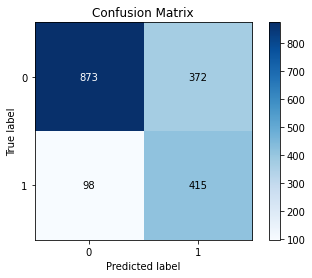

In [44]:
#matriz confusao balanceada
skplt.metrics.plot_confusion_matrix(y_test, y_pred_balanceado)

## Segundo resultado

Bom, aqui já fica mais claro que usando o balancemento escolhido temos uma melhora muito relevante na métrica foco (**Recall**), ou seja, usaremos essa base balanceada.

Tivemos um **Recall** de **81%**, o que é bem superior ao anterior.

Além disso, alguns dados interessantes:

lguns valores interessantes para compararmos mais tarde:

* **Acertos**: 415 casos vs 247 no modelo sem balanceamento **(BOM)**

* **Falso-Positivo**: 372 casos vs 140 no modelo sem balanceamento **"(RUIM)"**

* **Falso-Negativo**: 98 vs 266 casos no modelo sem balanceamento **(BOM)**


É interessante ressaltar o **aumento de casos Falso-Positivos**. 

Isso ocorre pelo motivo citado na parte de métodos de balanceamento. Para que conseguissemos ter um aumento nos acertos que nos interessa é necessário sacrificar alguns erros. Porém, isso é válido, tendo em vista que perder clientes é mais prejudicial do que achar que clientes irão nos abandonar e não abandonar.


# Decidindo o Modelo de Machine Learning 

Nessa etapa iremos testar diferentes modelos que servem para o nosso problema. O objetivo é escolhermos um modelo inicial com melhor resultado e depois melhora-lo mais ainda.

In [45]:
# Instanciando diferentes modelos

model_sgd = SGDClassifier()
model_svc = SVC()
model_dt = DecisionTreeClassifier()
model_xgboost = XGBClassifier()

# obtendo a métrica de recall dos modelos

model = []
recall = []

# Treinando e rodando os modelos
for clf in (model_sgd, model_svc, model_dt,model_xgboost):
  clf.fit(X_train_rus, y_train_rus)
  y_pred = clf.predict(X_test)
  model.append(clf.__class__.__name__)
  recall.append(recall_score(y_test,y_pred))

col = ['Recall']
ac = pd.DataFrame(data=recall, index = model,columns=col)
ac
     

,Recall
SGDClassifier,0.356725
SVC,0.500975
DecisionTreeClassifier,0.697856
XGBClassifier,0.808967


# Tunando o Modelo XGBoost

Podemos ver acima que o modelo de XGBoost teve um resultado melhor, ou seja, iremos trabalhar com ele.

Nosso objetivo aqui será tunar o modelo (com base na métrica Recall) para termos um resultado ainda melhor do que os **80%**

In [46]:
# Começar tunar modelo olhando para n_estimators

param_test = {
 'n_estimators':[50,100,500,1000,1500]
}

clf = GridSearchCV(XGBClassifier(
    learning_rate=0.1
    ), param_grid = param_test, scoring = 'recall')

clf.fit(X_train_rus, y_train_rus)


GridSearchCV(estimator=XGBClassifier(),
             param_grid={'n_estimators': [50, 100, 500, 1000, 1500]},
             scoring='recall')

In [47]:
# ver melhor parâmetro
print("Melhor: {} usando {}".format(clf.best_score_, clf.best_params_))

Melhor: 0.8156311048404602 usando {'n_estimators': 50}


In [48]:
# Tunando olhando para max_depth e min_child_weight
 
param_test2 = {
     'max_depth': [2,10,1],
     'min_child_weight': [1,7,1]
}

clf2 = GridSearchCV(XGBClassifier(
    learning_rate=0.1,
    n_estimators = 50
    ), param_grid = param_test2, scoring = 'recall')

clf2.fit(X_train_rus, y_train_rus)


GridSearchCV(estimator=XGBClassifier(n_estimators=50),
             param_grid={'max_depth': [2, 10, 1],
                         'min_child_weight': [1, 7, 1]},
             scoring='recall')

In [49]:
# ver melhor parâmetro
print("Melhor: {} usando {}".format(clf2.best_score_, clf2.best_params_))

Melhor: 0.8200618623833297 usando {'max_depth': 2, 'min_child_weight': 1}


In [50]:
# Tunando olhando para o gamma
 
param_test3 = {
     'gamma':[i/10.0 for i in range(0,11)]
}

clf3 = GridSearchCV(XGBClassifier(
    learning_rate=0.1,
    n_estimators = 50,
    max_depth = 1,
    min_child_weight = 1
    ), param_grid = param_test3, scoring = 'recall')

clf3.fit(X_train_rus, y_train_rus)


GridSearchCV(estimator=XGBClassifier(max_depth=1, n_estimators=50),
             param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                   0.9, 1.0]},
             scoring='recall')

In [51]:
# ver melhor parâmetro
print("Melhor: {} usando {}".format(clf3.best_score_, clf3.best_params_))

Melhor: 0.819321141740829 usando {'gamma': 0.0}


In [52]:
# Tunando olhando o aprendizado

param_test5 = {
 'learning_rate':[0.0001 , 0.001, 0.1, 1],
}


clf5 = GridSearchCV(XGBClassifier(
    n_estimators = 50,
    max_depth = 1,
    min_child_weight = 1,
    gamma = 0
    ), param_grid = param_test5, scoring = 'recall')

clf5.fit(X_train_rus, y_train_rus)

GridSearchCV(estimator=XGBClassifier(max_depth=1, n_estimators=50),
             param_grid={'learning_rate': [0.0001, 0.001, 0.1, 1]},
             scoring='recall')

In [53]:
# ver melhor parâmetro
print("Melhor: {} usando {}".format(clf5.best_score_, clf5.best_params_))

Melhor: 0.8805431951378336 usando {'learning_rate': 0.0001}


## Modelo final

Agora vamos rodar o modelo final com os hyperparameters achados sobre a base de teste.

In [54]:
# Instanciar com os hyperparameters tunados

model_final = XGBClassifier(
    learning_rate = 0.0001,
    n_estimators = 50,
    max_depth = 1,
    min_child_weight = 1,
    gamma = 0
    )

# treinar modelo final

model_final.fit(X_train_rus, y_train_rus)

# Fazer previsões em cima de novos dados
y_pred_final = model_final.predict(X_test)

In [55]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.93      0.56      0.70      1245
           1       0.46      0.90      0.61       513

    accuracy                           0.66      1758
   macro avg       0.70      0.73      0.66      1758
weighted avg       0.79      0.66      0.68      1758



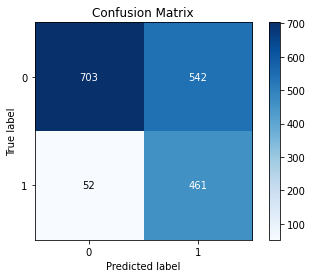

In [56]:
# matriz confusao final
skplt.metrics.plot_confusion_matrix(y_test, y_pred_final)

## Resultado

Após todo processo conseguimos chegar no resultado de **90%** na métrica **Recall**, ou seja, conseguimos prever **90%** dos clientes que abandonariam a empresa.

O foco desse projeto foi aumentar a métrica **Recall** para o caso positivo de Churn, como foi dito, isso prejudica outros valores. 

Vale a discussão de até que ponto é válido prejudicar outros valores, porém nesse notebook o objetivo foi concluído.

## Conclusão

* Analisar cuidadosamente o dataset e seus valores foi essencial para tratarmos da melhor forma possível os dados, por exemplo a questão do serviço de internet atrapalhar outras variáveis.

* Entender o problema de forma macro, não se limitando aos dados, foi essencial para determinarmos a métrica a ser utilizada.

* Testar diferentes bases de treino e diferentes modelos de machine learning foi essencial para chegarmos em uma porcentagem tão boa.

* Num cenário real, o ideal seria testarmos diferentes formas de balanceamento e de otimização (focando em outras métricas se necessário), para que no final fosse possível apresentar os resultados para que a empresa envolvida escolhesse o melhor para ela, por exemplo, um método que obteve **mais falsos positivos**, porém **maior quantidade de acertos nas fraudes**, um que teve **menos FP**, mas uma **menor acertividade** ou um **meio termo**, essas são decisões que valem ser discutidas com diferentes áreas envolvidas.
